# Exercice 2

In [1]:
%matplotlib inline  
from sympy.interactive import printing
printing.init_printing()
from frame import *
import sympy as sp
import numpy as np

Nous allons initialiser les differentes valeurs :

In [10]:
E=1.3 #en MPa
h=7.5 #en mm
b=20. #en mm
Lx=55. #en mm
Lyh=60. #en mm
Lyb=45 #en mm
I=b*(h**3)/12 #en mm^4
S=b*h  #en mm^2
eps=10**(-3)
g=9.81

Nous allons maintenant créer les noeuds et les éléments de la structure :

Frame with
7 elements
7 nodes
21 dofs


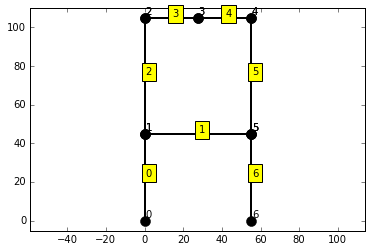

In [11]:
nodes= np.array([[0.,0.],[0.,Lyb],[0.,Lyh+Lyb],[Lx/2,Lyh+Lyb],[Lx,Lyh+Lyb],[Lx,Lyb],[Lx,0.]])
elements=np.array([[0,1],[1,5],[1,2],[2,3],[3,4],[4,5],[5,6]])

frame=LinearFrame(nodes,elements)
frame.plot_with_label()

In [12]:
ne = frame.nelements
ndof = frame.ndof
EI = np.ones(ne)*E*I
ES = np.ones(ne)*E*S
f_x = 0*np.ones(7)
f_y = 0*np.ones(7)
frame.set_distributed_loads(f_x, f_y)
frame.set_stiffness(EI, ES)
blocked_dof = np.array([0, 1, 2, ndof-3, ndof-2, ndof-1])
bc_values = np.array([0, 0, 0, 0, 0, 0])

In [13]:
K = frame.assemble_K()


In [14]:
u=np.array([0.,0.,0.,
            2.,0.,0.,
            5.,0.,0.,
            0.,-3.,0.,
            -3.,0.,0.,
            -2.,0.,0.,
            0.,0.,0.])

print (u)


[ 0.  0.  0.  2.  0.  0.  5.  0.  0.  0. -3.  0. -3.  0.  0. -2.  0.  0.
  0.  0.  0.]


In [15]:
F= np.dot(K,np.transpose(u))
F


array([ -2.40740741e-01,  -5.15939161e-16,   5.41666667e+00,
         1.42702152e+01,  -7.17477895e-17,   9.98697917e+00,
         3.56068892e+01,   1.58226897e+00,   2.63265108e+01,
        -1.41818182e+01,  -3.16453794e+00,   0.00000000e+00,
        -2.13235085e+01,   1.58226897e+00,  -2.32796358e+01,
        -1.43717777e+01,   3.20043511e-16,  -6.94010417e+00,
         2.40740741e-01,  -5.15939161e-16,  -5.41666667e+00])

In [16]:
m=F[10]/g
m

La masse accrochée serait d'environ 320g

# Exercice 3

Dans cette exercice, on doit créer des fonctions à l'intérieur de notre classe frame afin de récupérer l'effort normal(N), l'effort tangentielle (T) et le moment sur z (M).

In [ ]:
def find_N(self,element):
        """
        Returns the normal force of an element.
        """
        F = self.assemble_F()
        N = F[3*element]
        return N
    
def find_T(self,element):
        """
        Returns the tangential force of an element.
        """
        F = self.assemble_F()
        T = F[3*element+1]
        return T
    
def find_M(self,element):
        """
        Returns the moment of an element.
        """
        F = self.assemble_F()
        M = F[3*element+2]
        return M